## Model Training

### Import Data and Required Packages

In [79]:
# Basic Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Model Imports
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### Get into the dataset using Pandas DataFrame

In [80]:
df = pd.read_csv('data/study.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Let Math Scores be the Dependent Feature and the remaining as the Independent Features

In [81]:
X = df.drop('math score', axis = 1)
y = df['math score']

### Create Column Transformer with 3 types of Transformers

In [82]:
# Get numeric and categorical features
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

# Necessary Imports
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer  # Used for tranforming the numeric and categorical features

# Create the Transformers for numeric and categorical features
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

# Create pipeline to transform your tabular data - Much powerful way to perform the transformations!
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),         # Convert Categorical Features into One Hot Encoding
         ("StandardScaler", numeric_transformer, num_features),  # Scaling the Data between 0 and 1     
    ]
)

In [83]:
# Apply the transformation using the preprocessor pipeline we created above
X = preprocessor.fit_transform(X)

In [84]:
# Check how it looks like
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [85]:
# Check the shape!!
X.shape

(1000, 19)

### Split the data for Training and Testing

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an evaluation function to give all the metrics after model is trained

In [87]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

### Building, Creating, Training and Evaluating different Machine Learning Models

In [88]:
models = {
    "Liner Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors" : KNeighborsRegressor(),
    "Decission Tree" : DecisionTreeRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(verbose = False),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    
    # Build and Train Models
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the training of the Models
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Append and Print the Outputs
    model_list.append(list(models.keys())[i])

    print(f"{i+1}) MODEL PERFORMANCE : {list(models.keys())[i].upper()}\n")


    print("+++ TRAINING SET +++")
    print("- Root Mean Squared Error : {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error : {:.4f}".format(model_train_mae))
    print("- R2 Score : {:.4f}".format(model_train_r2))

    print("\n-----------------------------------\n")

    print("+++ TESTING SET +++")
    print("- Root Mean Squared Error : {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error : {:.4f}".format(model_test_mae))
    print("- R2 Score : {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print('\n')
    print("="*35)
    print("\n")    

1) MODEL PERFORMANCE : LINER REGRESSION

+++ TRAINING SET +++
- Root Mean Squared Error : 5.3293
- Mean Absolute Error : 4.2715
- R2 Score : 0.8740

-----------------------------------

+++ TESTING SET +++
- Root Mean Squared Error : 5.4252
- Mean Absolute Error : 4.2222
- R2 Score : 0.8790




2) MODEL PERFORMANCE : LASSO

+++ TRAINING SET +++
- Root Mean Squared Error : 6.5938
- Mean Absolute Error : 5.2063
- R2 Score : 0.8071

-----------------------------------

+++ TESTING SET +++
- Root Mean Squared Error : 6.5197
- Mean Absolute Error : 5.1579
- R2 Score : 0.8253




3) MODEL PERFORMANCE : RIDGE

+++ TRAINING SET +++
- Root Mean Squared Error : 5.3233
- Mean Absolute Error : 4.2650
- R2 Score : 0.8743

-----------------------------------

+++ TESTING SET +++
- Root Mean Squared Error : 5.3904
- Mean Absolute Error : 4.2111
- R2 Score : 0.8806




4) MODEL PERFORMANCE : K-NEIGHBORS

+++ TRAINING SET +++
- Root Mean Squared Error : 5.7079
- Mean Absolute Error : 4.5168
- R2 Score 

### Create a DataFrame to store the R2 Score for each Model in the Descending Order

In [89]:
r2_results = pd.DataFrame(list(zip(model_list, r2_list)), columns = ["Model", "R2 Score"]).sort_values(by = ["R2 Score"], ascending = False)
r2_results.reset_index(inplace = True, drop = True)
r2_results.index +=1
r2_results

,Model,R2 Score
1,Ridge,0.880593
2,Liner Regression,0.879046
3,CatBoosting Regressor,0.851632
4,AdaBoost Regressor,0.847632
5,Lasso,0.825320
6,XGBRegressor,0.821589
7,K-Neighbors,0.783813
8,Decission Tree,0.743608


### Linear Regression 

In [93]:
lin_model = LinearRegression(fit_intercept = True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test).astype('float32')
score = r2_score(y_test, y_pred)*100
print('Linear Regression is {:.2f}% accurate'.format(score))

Linear Regression is 87.90% accurate


### Plotting y_pred and y_test 

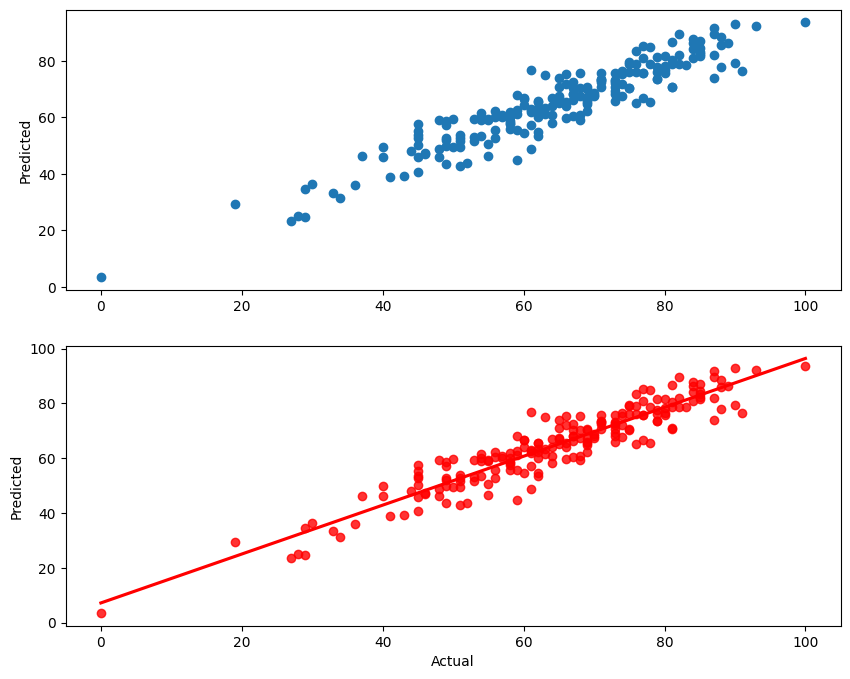

In [102]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.scatter(y_test, y_pred)
plt.ylabel('Predicted')
plt.subplot(212)
sns.regplot(x = y_test, y = y_pred, ci = None, color = 'red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Difference between Actual and Predicted

In [106]:
pred_df = pd.DataFrame({'Actual Value' : y_test, 
                        'Predicted Value' : y_pred, 
                        'Difference' : np.abs(y_test - y_pred)}).sort_values(by = 'Difference', ascending = True)
pred_df

,Actual Value,Predicted Value,Difference
590,58,58.0625,0.0625
260,64,63.9375,0.0625
370,84,84.0625,0.0625
86,76,75.9375,0.0625
259,65,65.1250,0.1250
...,...,...,...
371,45,57.6875,12.6875
859,87,73.9375,13.0625
265,59,44.8125,14.1875
521,91,76.4375,14.5625
